In [2]:

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

data = []
evs = []
with open("evs.txt", "r") as f:
    data = [eval(r) for r in f.readlines()]
    evs = [[c[1] for c in r] for r in data]

# print(evs)

w_space = np.linspace(0, len(evs)-1, len(evs))
l_space_norm = np.linspace(0, 3, len(evs[-1]))

ws, ls = np.meshgrid(w_space, l_space_norm)


def f(x, y):
    return evs[round(x)][round(y)]

X = ws
Y = ls * ws

Z = np.zeros(np.shape(X))
for i in range(np.shape(Z)[0]):
    for j in range(np.shape(Z)[1]):
        Z[i][j] = evs[round(X[i][j])][round(Y[i][j])]

Text(0.5, 0.92, 'surface')

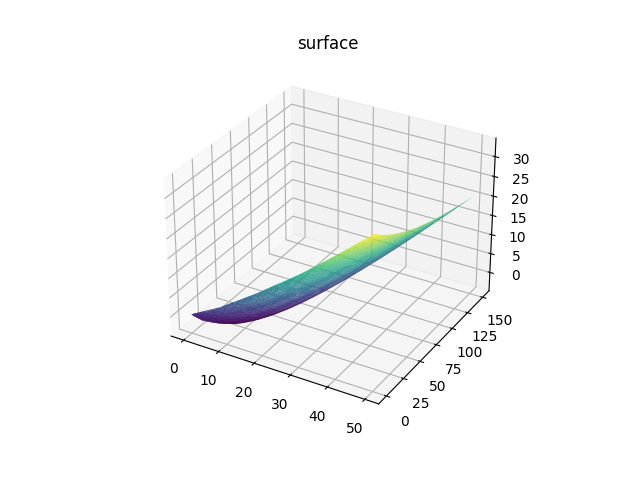

In [3]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')

In [107]:
import coin_flipping as cf
import numpy as np

MAX_W = 50
PRECISION = 0.1
STEPS = round(MAX_W / PRECISION) + 1
TOLERANCE = 0.1

print("Running for parameters:")
print(f"{MAX_W=} {PRECISION=} {STEPS=} {TOLERANCE=}")

lower_bound = lambda t: 0.0002 * t**4 - .05
upper_bound = lambda t: 0.001 * t**4 + 7

balance_win_amts = np.linspace(0, MAX_W, STEPS)
balance_lose_amts = np.zeros(STEPS)

for i in range(np.shape(balance_win_amts)[0]):
    w = balance_win_amts[i]
    low = lower_bound(w)
    high = upper_bound(w)

    if w < 4:
        low = w - 1
        high = w + 1
    
    while high - low > TOLERANCE:
        mid = (high + low)/2
        cf.value_accuse.cache_clear()
        cf.value_pardon.cache_clear()
        check = cf.build_ev_table(win_amt=w, lose_amt=mid)
        if check[0][0][1] > 0:
            low = mid
        elif check[0][0][1] < 0:
            high = mid
        else:
            break

    ans = (high + low) / 2
    print("win amt:", w)
    print("lose amt:", ans)
    balance_lose_amts[i] = ans
    print("Completed", i, "/", STEPS - 1)

print(balance_lose_amts)
np.save("balance_win_amts-500.npy", balance_win_amts)
np.save("balance_lose_amts-500.npy", balance_lose_amts)

Running for parameters:
MAX_W=50 PRECISION=0.1 STEPS=501 TOLERANCE=0.1
win amt: 0.0
lose amt: 0.0
Completed 0 / 500
win amt: 0.1
lose amt: 0.06875000000000003
Completed 1 / 500
win amt: 0.2
lose amt: 0.23124999999999996
Completed 2 / 500
win amt: 0.30000000000000004
lose amt: 0.30000000000000004
Completed 3 / 500
win amt: 0.4
lose amt: 0.4312499999999999
Completed 4 / 500
win amt: 0.5
lose amt: 0.5
Completed 5 / 500
win amt: 0.6000000000000001
lose amt: 0.6000000000000001
Completed 6 / 500
win amt: 0.7000000000000001
lose amt: 0.6687500000000002
Completed 7 / 500
win amt: 0.8
lose amt: 0.8
Completed 8 / 500
win amt: 0.9
lose amt: 0.9312499999999999
Completed 9 / 500
win amt: 1.0
lose amt: 1.0
Completed 10 / 500
win amt: 1.1
lose amt: 1.1
Completed 11 / 500
win amt: 1.2000000000000002
lose amt: 1.2000000000000002
Completed 12 / 500
win amt: 1.3
lose amt: 1.3312499999999998
Completed 13 / 500
win amt: 1.4000000000000001
lose amt: 1.3687500000000004
Completed 14 / 500
win amt: 1.5
lose am

[3.46401349 0.13192425]
R2 0.9998793156554917


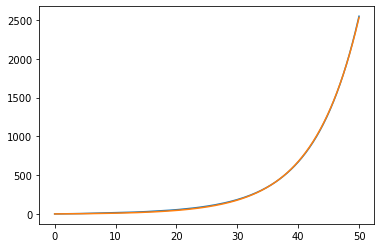

In [141]:
import matplotlib.pyplot as plt
import numpy as np

import scipy

from sklearn.metrics import r2_score

# [0, 5), [5, 9), [9, 12), [12, 14)

START = 0
END = 501

balance_win_amts = np.load("balance_win_amts.npy")[START:END]
balance_lose_amts = np.load("balance_lose_amts.npy")[START:END]
# print(balance_win_amts)
# print(balance_lose_amts)

f = lambda t, a, b : a * (np.exp(b * t) - 1)
g = lambda t:  np.exp(.2 * t)

fit, _ = scipy.optimize.curve_fit(f, balance_win_amts, balance_lose_amts, p0=(1, 0.2))
print(fit)

print("R2", r2_score(balance_lose_amts, f(balance_win_amts, *fit)))

plt.figure().clear()
plt.plot(balance_win_amts, balance_lose_amts)
plt.plot(balance_win_amts, f(balance_win_amts, *fit))
# plt.plot(balance_win_amts, g(balance_win_amts))
# print("diff", np.min(g(balance_win_amts) - balance_lose_amts))
plt.show()